In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



import warnings
warnings.filterwarnings('ignore')


import os

In [2]:
current_path = os.getcwd()
assets_path = os.path.join(current_path, "assets")
data_path= os.path.join(assets_path, r"C:\Users\user\Desktop\Death rate prediction of covid and other deseases\covid.csv")
df=pd.read_csv(data_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [4]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,566602.0,1.506726,0.499955,1.0,1.0,2.0,2.0,2.0
patient_type,566602.0,1.215165,0.410937,1.0,1.0,1.0,1.0,2.0
intubed,566602.0,76.562952,39.058676,1.0,97.0,97.0,97.0,99.0
pneumonia,566602.0,1.846262,0.560939,1.0,2.0,2.0,2.0,99.0
age,566602.0,42.622483,16.659973,0.0,31.0,41.0,53.0,120.0
pregnancy,566602.0,50.400692,47.501579,1.0,2.0,97.0,97.0,98.0
diabetes,566602.0,2.210633,5.683523,1.0,2.0,2.0,2.0,98.0
copd,566602.0,2.280221,5.327832,1.0,2.0,2.0,2.0,98.0
asthma,566602.0,2.265029,5.334658,1.0,2.0,2.0,2.0,98.0
inmsupr,566602.0,2.319628,5.667381,1.0,2.0,2.0,2.0,98.0


In [6]:
df=df[df['covid_res'] != 3]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   499692 non-null  object
 1   sex                  499692 non-null  int64 
 2   patient_type         499692 non-null  int64 
 3   entry_date           499692 non-null  object
 4   date_symptoms        499692 non-null  object
 5   date_died            499692 non-null  object
 6   intubed              499692 non-null  int64 
 7   pneumonia            499692 non-null  int64 
 8   age                  499692 non-null  int64 
 9   pregnancy            499692 non-null  int64 
 10  diabetes             499692 non-null  int64 
 11  copd                 499692 non-null  int64 
 12  asthma               499692 non-null  int64 
 13  inmsupr              499692 non-null  int64 
 14  hypertension         499692 non-null  int64 
 15  other_disease        499692 non-nu

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.sex.replace({1: 'Female', 2: 'Male'}, inplace=True)
df.patient_type.replace({1: 'notHospitalized', 2: 'Hospitalized'}, inplace=True)
df.intubed.replace({1: 'Yes', 2: 'No',97:'Not Specified', 98:'Not Specified',99:'Not Specified'}, inplace=True)
df.pneumonia.replace({1: 'Yes', 2: 'No', 98:'Not Specified',99:'Not Specified', 97:'Not Specified'}, inplace=True)
df.pregnancy.replace({1: 'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.diabetes.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.copd.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.asthma.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.inmsupr.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.hypertension.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.other_disease.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.cardiovascular.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.obesity.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.renal_chronic.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.tobacco.replace({1:'Yes', 2: 'No', 99:'Not Specified',98:'Not Specified', 97:'Not Specified'}, inplace=True)
df.contact_other_covid.replace({1: 'Yes', 2: 'No', 97:'Not Specified',99:'Not Specified',98:'Not Specified'}, inplace=True)
df.covid_res.replace({1: 'Positive', 2: 'Negative'}, inplace=True)
df.icu.replace({1: 'Yes', 2: 'No', 97:'Not Specified',98:'Not Specified', 99:'Not Specified'}, inplace=True)

In [10]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,Male,notHospitalized,04-05-2020,02-05-2020,9999-99-99,Not Specified,No,27,Not Specified,...,No,No,No,No,No,No,No,No,Positive,Not Specified
1,1009bf,Male,notHospitalized,19-03-2020,17-03-2020,9999-99-99,Not Specified,No,24,Not Specified,...,No,No,No,No,No,No,No,Not Specified,Positive,Not Specified
2,167386,Female,Hospitalized,06-04-2020,01-04-2020,9999-99-99,No,No,54,No,...,No,No,No,No,Yes,No,No,Not Specified,Positive,No
3,0b5948,Male,Hospitalized,17-04-2020,10-04-2020,9999-99-99,No,Yes,30,Not Specified,...,No,No,No,No,No,No,No,Not Specified,Positive,No
4,0d01b5,Female,Hospitalized,13-04-2020,13-04-2020,22-04-2020,No,No,60,No,...,No,Yes,No,Yes,No,No,No,Not Specified,Positive,No


In [11]:
cat_features=df.select_dtypes(include='object').columns.tolist()
print("Categorical Features:",cat_features)
num_features=df.select_dtypes(exclude='object').columns.tolist()
print("Numerical Features:",num_features)

Categorical Features: ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']
Numerical Features: ['age']


In [12]:
df['date_died'].replace('9999-99-99','Not Applicable',inplace=True)
date_fields=['entry_date','date_symptoms']
for dates in date_fields:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

In [13]:
df.head(4)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,Male,notHospitalized,2020-04-05,2020-02-05,Not Applicable,Not Specified,No,27,Not Specified,...,No,No,No,No,No,No,No,No,Positive,Not Specified
1,1009bf,Male,notHospitalized,2020-03-19,2020-03-17,Not Applicable,Not Specified,No,24,Not Specified,...,No,No,No,No,No,No,No,Not Specified,Positive,Not Specified
2,167386,Female,Hospitalized,2020-06-04,2020-01-04,Not Applicable,No,No,54,No,...,No,No,No,No,Yes,No,No,Not Specified,Positive,No
3,0b5948,Male,Hospitalized,2020-04-17,2020-10-04,Not Applicable,No,Yes,30,Not Specified,...,No,No,No,No,No,No,No,Not Specified,Positive,No


Text(0.5, 6.79999999999999, 'Results \n Test postivity rate: 71.94 %')

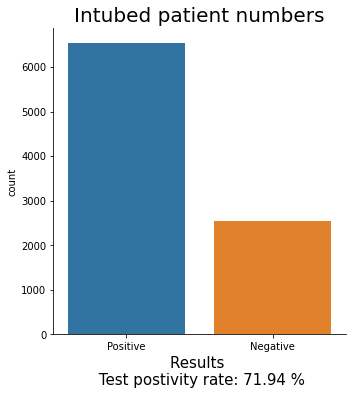

In [14]:
df_intubed=df[df['intubed']=='Yes']
sns.catplot('covid_res',data=df_intubed,kind='count')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_intubed['covid_res'].value_counts()[0]/df_intubed['covid_res'].size),size=15)

In [18]:
df_intubed.reset_index(drop=True,inplace=True)
df_intubed['Fatal']=np.nan

i=0
for i in range(len(df_intubed)):
    if df_intubed['date_died'][i]!='Not Applicable':
        df_intubed['Fatal'][i]='Yes'

In [19]:
df_intubed['Fatal'].fillna('No',inplace=True)

In [20]:
df_int_pos=df_intubed[df_intubed['covid_res']=='Positive']

Text(24.911249999999995, 0.5, 'Intubated patients')

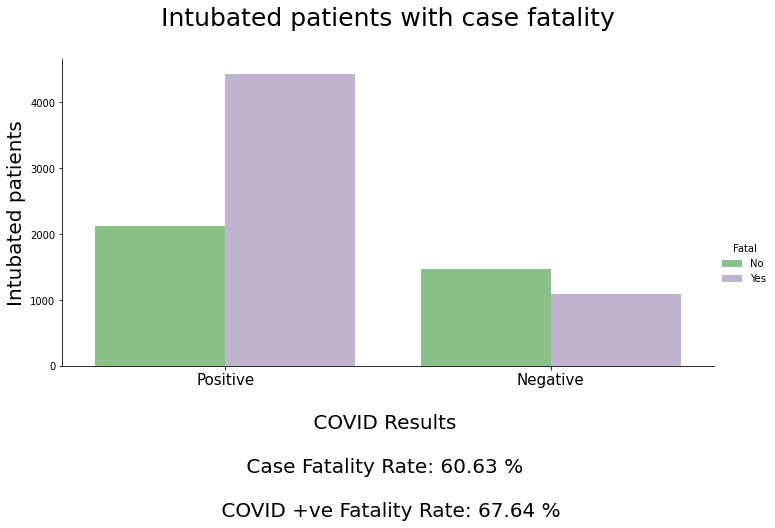

In [26]:
sns.catplot('covid_res',kind='count',hue='Fatal',data=df_intubed,palette='Accent',height=5,aspect=2)
plt.title('Intubated patients with case fatality\n',size=25)

plt.xlabel('\n COVID Results  \n \n Case Fatality Rate: {0:.2f} %  \n \n COVID +ve Fatality Rate: {1:.2f} %'.format(100* df_intubed['Fatal'].value_counts()[0]/df_intubed.shape[0],100 * df_int_pos['Fatal'].value_counts()[0]/df_int_pos.shape[0]),size=20)
plt.xticks(size=15)
plt.ylabel('Intubated patients',size=20)